# Explorative Data Analysis

## Import packages 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from argsum import load_test_df

# Set the font family for all text
plt.rcParams["font.family"] = "Times New Roman"

# Set the same font for math text
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"

/Users/moritz/miniconda3/envs/AM/lib/python3.8/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/Users/moritz/miniconda3/envs/AM/lib/python3.8/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
loading configuration file config.json from cache at /Users/moritz/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/12040accade4e8a0f71eabdb258fecc2e7e948be/config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMa

## Load datasets

In [2]:
ArgQ = pd.read_csv('data/IBM-ArgQ-Rank-30kArgs/dataset_scores.csv')
ArgKP21 = pd.read_csv('data/ArgKP-2021/dataset_splits_scores.csv')
Debate = pd.read_csv('data/Debate/dataset_scores.csv')

ArgKP21_processed_test = load_test_df(name = 'ArgKP21')
Debate_processed_test = load_test_df(name = 'Debate')

## Inspect topics

### Number of topics

In [11]:
pd.DataFrame({'ArgQ':len(ArgQ.topic.unique()),
              'ArgKP21':len(ArgKP21.topic.unique())}, index = ['Number of topics'])

,ArgQ,ArgKP21
Number of topics,71,31


### Train / dev / test split topics

In [12]:
pd.DataFrame({'ArgQ':[len(ArgQ[ArgQ.set == 'train'].topic.unique()), len(ArgQ[ArgQ.set == 'dev'].topic.unique()), len(ArgQ[ArgQ.set == 'test'].topic.unique())],
              'ArgKP21':[len(ArgKP21[ArgKP21.set == 'train'].topic.unique()), len(ArgKP21[ArgKP21.set == 'dev'].topic.unique()), len(ArgKP21[ArgKP21.set == 'test'].topic.unique())]},
              index = ['train', 'dev', 'test'])

,ArgQ,ArgKP21
train,49,24
dev,7,4
test,15,3


## Inspect arguments / (argument, key point) pairs

In [13]:
print('ArgQ:\t\targuments')
print('ArgKP21:\t(argument, key point) pairs')

pd.DataFrame({'ArgQ':[len(ArgQ[ArgQ.set == 'train']), len(ArgQ[ArgQ.set == 'dev']), len(ArgQ[ArgQ.set == 'test'])],
              'ArgKP21':[len(ArgKP21[ArgKP21.set == 'train']), len(ArgKP21[ArgKP21.set == 'dev']), len(ArgKP21[ArgKP21.set == 'test'])]},
              index = ['train', 'dev', 'test'])

ArgQ:		arguments
ArgKP21:	(argument, key point) pairs


,ArgQ,ArgKP21
train,20974,20635
dev,3208,3458
test,6315,3426


In [14]:
print('unique arguments')
pd.DataFrame({'ArgKP21':[len(ArgKP21[ArgKP21.set == 'train'].argument.unique()), 
                         len(ArgKP21[ArgKP21.set == 'dev'].argument.unique()), 
                         len(ArgKP21[ArgKP21.set == 'test'].argument.unique())]},
              index = ['train', 'dev', 'test'])

unique arguments


,ArgKP21
train,5583
dev,932
test,723


In [15]:
print(('number of arguments in ArgQ for train/dev/test split topics of ArgKP21'))
pd.DataFrame({'ArgKP21':[len(ArgQ[ArgQ.topic.isin(ArgKP21[ArgKP21.set == 'train'].topic.unique())]), 
                         len(ArgQ[ArgQ.topic.isin(ArgKP21[ArgKP21.set == 'dev'].topic.unique())]), 
                         len(ArgQ[ArgQ.topic.isin(ArgKP21[ArgKP21.set == 'test'].topic.unique())])]},
              index = ['train', 'dev', 'test'])

number of arguments in ArgQ for train/dev/test split topics of ArgKP21


,ArgKP21
train,10324
dev,1775
test,0


## Number of matched key points

In [24]:
unique_args = ArgKP21['argument'].unique()
unique_kps = ArgKP21['key_point'].unique()

match_counts = []
for arg in unique_args:
    mask = ArgKP21['argument'] == arg
    match_counts.append(np.sum(ArgKP21[mask]['label'].to_list()))

unique, counts = np.unique(match_counts, return_counts=True)
unique_counts = dict(zip(unique, np.round(counts/len(match_counts),4)))
unique_counts

{0: 0.2831, 1: 0.6681, 2: 0.0477, 3: 0.0011}

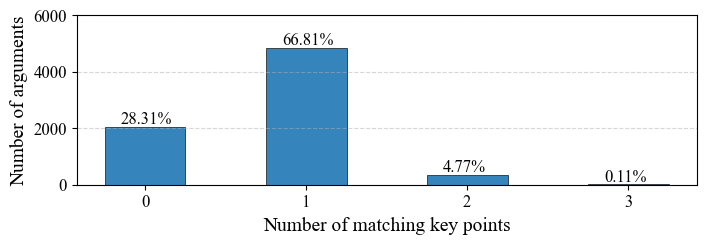

In [31]:

plt.figure(figsize = (8,2.2))
hist = plt.hist(match_counts, bins = [0,0.5,1,1.5,2,2.5,3,3.5], color = 'tab:blue', edgecolor = 'black', linewidth = 0.5, alpha = 0.9)
plt.xlabel('Number of matching key points', fontsize = 14)
plt.ylabel('Number of arguments', fontsize = 14)
plt.xticks(ticks = [0.25, 1.25, 2.25, 3.25], labels = [0,1,2,3], fontsize = 12)
plt.yticks(ticks = [i for i in range(0,6001,2000)], fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
for high, key in enumerate(unique_counts.keys()):
    plt.text(key+0.1, hist[0][hist[0] > 0][high]+120, f'{np.round(unique_counts[key]*100,3)}%', fontsize = 12)
plt.show()

## Number of unique arguments

In [61]:
# Load dataset
debate_scores = pd.read_csv('data/Debate/dataset_scores.csv')
debate_scores_processed = pd.read_csv('data/Debate/dataset_scores_processed.csv')
print(len(debate_scores.argument.unique()), len(debate_scores_processed.argument.unique()))

3180 2321


In [62]:
# Load dataset
ArgKP21 = pd.read_csv('data/ArgKP-2021/dataset_splits_scores.csv')
ArgKP21_processed = pd.read_csv('data/ArgKP-2021/dataset_splits_scores_processed.csv')
print(len(ArgKP21[ArgKP21['set'] == 'test'].argument.unique()), len(ArgKP21_processed[ArgKP21_processed['set'] == 'test'].argument.unique()))

723 428
